## 一、算法介绍

### 1.1 DBSCAN概述

DBSCAN是一种基于密度的聚类算法，其核心思想是通过密度的概念来定义簇。与传统的K-Means等算法不同，DBSCAN不需要预先指定簇的数量，而是根据数据的局部密度来进行聚类。这使得DBSCAN能够自动识别任意形状的簇，并且能够有效处理噪声数据。

DBSCAN的核心思想是通过以下两个参数来定义簇的密度：

- **ε（Epsilon，ε）**：邻域半径，指定数据点周围的邻域范围。
- **MinPts**：指定一个簇内至少需要包含的点数。

在DBSCAN中，数据点可以分为以下三类：

1. **核心点（Core Point）**：在该点的ε邻域内包含至少MinPts个点。
2. **边界点（Border Point）**：在该点的ε邻域内包含少于MinPts个点，但该点属于某个核心点的邻域。
3. **噪声点（Noise Point）**：既不是核心点也不是边界点，属于离群点。

### 1.2 DBSCAN的优点与缺点

**优点**：

- **无需指定簇的数量**：DBSCAN自动根据数据的密度来确定簇的数量。
- **能够识别任意形状的簇**：DBSCAN能够识别非凸形状的簇，适合处理复杂的数据分布。
- **能够处理噪声数据**：DBSCAN能够有效地将离群点（噪声）从聚类中剔除，提升聚类质量。

**缺点**：

- **参数敏感**：DBSCAN对ε和MinPts的选择较为敏感，参数选择不当可能导致聚类效果不理想。
- **难以处理不同密度的簇**：当数据集存在不同密度的簇时，DBSCAN的效果可能不理想。
- **高维数据问题**：在高维数据中，距离度量变得不再有效，DBSCAN的性能可能会下降。

## 二、算法原理

### 2.1 密度定义

DBSCAN通过点的密度来定义簇，基本原理如下：

- 对于数据集中的每个点，首先找到它的ε邻域内的所有点。
- 如果一个点的ε邻域内的点数大于或等于MinPts，则该点为核心点，并形成一个簇。
- 如果一个点是某个核心点的邻域内的点（即边界点），则将该点归入该核心点所属的簇。
- 否则，该点被视为噪声点。

### 2.2 算法流程

1. **选择一个未访问过的点**。
2. **检查该点的ε邻域内的点数**：
   - 如果点的邻域内包含至少MinPts个点，则该点为核心点，将其与邻域内的其他点组成一个簇。
   - 如果点的邻域内包含少于MinPts个点，则将其标记为噪声点。
3. **扩展簇**：如果当前点是核心点，则递归地将邻域内的所有点加入簇中，并继续扩展簇，直到所有可达的点都被访问。
4. **重复以上步骤**，直到所有点都被处理过。

### 2.3 数学公式

假设数据集为$X=\{x_1, x_2, ..., x_N\}$，其中每个数据点$x_i$的邻域为$N_{\epsilon}(x_i)$，即所有与$x_i$的距离小于或等于$\epsilon$的点。定义：

- 对于一个点$x_i$，如果$|N_{\epsilon}(x_i)| \geq \text{MinPts}$，则$x_i$是核心点。
- 对于一个点$x_j$，如果存在一个核心点$x_i$，使得$x_j \in N_{\epsilon}(x_i)$，则$x_j$是边界点。
- 否则，$x_j$是噪声点。

### 2.4 聚类算法复杂度

DBSCAN的时间复杂度通常为$O(N \log N)$，其中$N$是数据集中的数据点个数。具体复杂度与数据的分布和距离计算的方式相关。

## 三、案例分析

为了更好地理解DBSCAN算法，下面我们将通过一个具体的案例进行分析。我们将使用Python中的`scikit-learn`库生成模拟数据，并实现DBSCAN聚类算法。

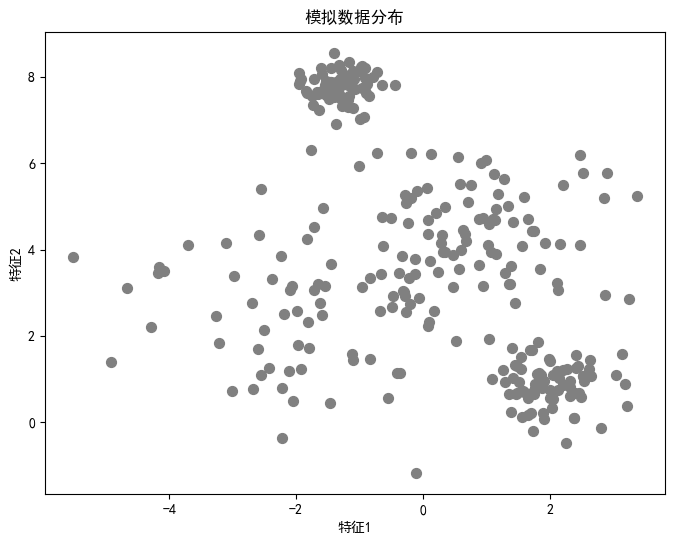

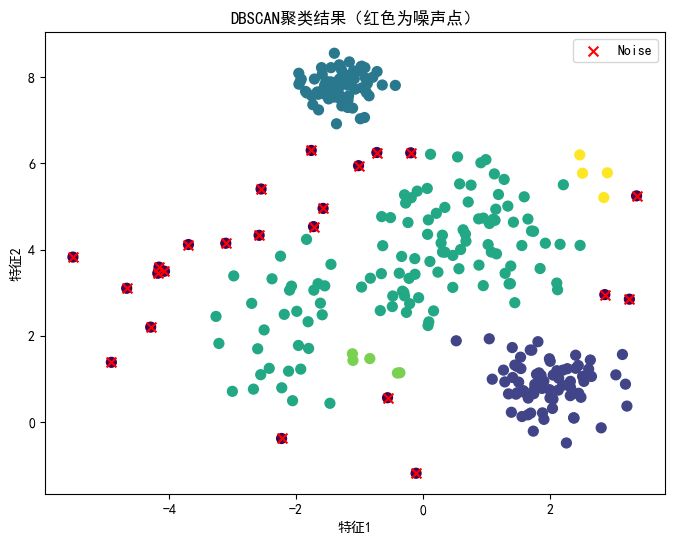

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 生成模拟数据
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=[1.0, 0.5, 1.5, 0.3], random_state=0)

# 可视化模拟数据
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, color='gray')
plt.title("模拟数据分布")
plt.xlabel("特征1")
plt.ylabel("特征2")
plt.show()

# 使用DBSCAN进行聚类
db = DBSCAN(eps=0.7, min_samples=5)
y_db = db.fit_predict(X)

# 可视化DBSCAN聚类结果
plt.figure(figsize=(8, 6))

# 颜色映射：-1 表示噪声点
plt.scatter(X[:, 0], X[:, 1], c=y_db, cmap='viridis', s=50)

# 高亮噪声点
plt.scatter(X[y_db == -1, 0], X[y_db == -1, 1], color='red', label='Noise', s=50, marker='x')

plt.title("DBSCAN聚类结果（红色为噪声点）")
plt.xlabel("特征1")
plt.ylabel("特征2")
plt.legend()
plt.show()
